Paths and package imports

In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE

ROOT_FOLDER = "C:\\Users\\liamo\\Documents\\BIOINF\\PRETHESIS"

if os.path.join(ROOT_FOLDER,"CODE","CLEAN") not in sys.path: sys.path.append(os.path.join(ROOT_FOLDER,"CODE","CLEAN"))
from thresholding import local2_thresholding 

#TPM
GTEX_DATA_PATH = os.path.join(ROOT_FOLDER,"DATA","GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct")
GTEX_MEDIAN_DATA_PATH = os.path.join(ROOT_FOLDER,"DATA","GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct")
#metadata for filtering
GTEX_ATT_PATH = os.path.join(ROOT_FOLDER,"DATA","GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt")
GTEX_META_PATH = os.path.join(ROOT_FOLDER,"DATA","GTEx_Analysis_v8_Annotations_SubjectPhenotypesDS.txt")

In [2]:
data_sample = pd.read_csv(GTEX_DATA_PATH,header=2,sep="\t", nrows=5)
data_atts = pd.read_csv(GTEX_ATT_PATH,header=0,sep="\t")
meta_data = pd.read_csv(GTEX_META_PATH,header=0,sep="\t")

All samples

In [82]:
data_sample

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
1,ENSG00000227232.5,WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
2,ENSG00000278267.1,MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


### Filtering by tissue and RIN quality (>= 6)

In [83]:
tissues = ["Adipose - Subcutaneous","Breast - Mammary Tissue","Kidney - Cortex","Liver"]
#only 4 "kidney - medulla", which will be discontinued

#tissue sample & rna quality filter  
data = data_atts[(data_atts["SMTSD"].str.contains(
    "|".join(tissues),case=False, regex=True)) & (
        data_atts["SMRIN"] >=6)].sort_values("SMRIN",axis=0,ascending=False) #(1369, 63)

#cross checking donor ids    
save_samples = list(set(data.iloc[:,0]).intersection(set(data_sample.columns.values))) #1228

data_read = pd.read_csv(GTEX_DATA_PATH,header=2,sep="\t", usecols=["Name"]+save_samples)
# del data,data_sample,data_atts
# data_read.info() #527MB shape: (56200, 1229)

data_read.index = data_read["Name"]
data_read = data_read.drop(["Name"],axis=1) #(56200, 1228)
# data_read.to_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_4tissues_rin6_tpm.csv"))

In [100]:
# data_read = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_4tissues_rin6_tpm.csv"),header=0,index_col=0)

In [85]:
# data_read.quantile().describe() #por amostra
data_read.head()

,GTEX-1117F-0226-SM-5GZZ7,GTEX-111CU-1826-SM-5GZYN,GTEX-111FC-0226-SM-5N9B8,GTEX-111VG-2326-SM-5N9BK,GTEX-111YS-1926-SM-5GICC,GTEX-111YS-2426-SM-5GZZQ,GTEX-1122O-1226-SM-5H113,GTEX-1122O-2026-SM-9YFMG,GTEX-1128S-2126-SM-5H12U,GTEX-113IC-0226-SM-5HL5C,...,GTEX-ZYT6-2226-SM-5GIC9,GTEX-ZYVF-0226-SM-5GIEG,GTEX-ZYW4-0226-SM-5E44M,GTEX-ZYW4-0826-SM-5GIDG,GTEX-ZYY3-0226-SM-5E45M,GTEX-ZZ64-1226-SM-5E43R,GTEX-ZZ64-1626-SM-5E43W,GTEX-ZZPU-0426-SM-5GZYH,GTEX-ZZPU-0626-SM-5E43T,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.00000,0.000,0.00000,0.0000,0.02382,0.00000,0.000,0.00000,0.000,0.03113,...,0.0189,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.02180,0.04273,0.02522
ENSG00000227232.5,8.76400,3.082,4.20000,3.2010,4.18600,3.10600,3.248,2.61000,4.111,4.78300,...,3.8390,2.81400,1.57200,2.55000,4.4060,2.46600,4.20100,1.13500,2.00300,2.16700
ENSG00000278267.1,0.00000,0.000,0.00000,0.5898,0.00000,0.00000,0.000,0.00000,0.000,0.00000,...,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000
ENSG00000243485.5,0.07187,0.000,0.04183,0.0000,0.00000,0.00000,0.000,0.02779,0.000,0.06216,...,0.0000,0.00000,0.06183,0.05836,0.0508,0.00000,0.05113,0.04352,0.04265,0.00000
ENSG00000237613.2,0.00000,0.000,0.00000,0.0000,0.00000,0.03718,0.000,0.00000,0.000,0.04416,...,0.0000,0.04791,0.00000,0.00000,0.0000,0.05597,0.00000,0.00000,0.00000,0.00000


### Metadata: age, gender and tissue

Filtered RIN6 + 4 tissues samples

In [94]:
#metadata - for filtering and analysis
#keep matching samples
tissues_clean = data.loc[data["SAMPID"].str.contains(
    "|".join(list(data_read.columns)),case=False, regex=True),["SAMPID","SMTSD"]]
donors = ["-".join(x.split("-")[:2]) for x in tissues_clean.loc[:,"SAMPID"]]

tissue_meta = pd.DataFrame(list(tissues_clean["SMTSD"]),
                           index=list(tissues_clean["SAMPID"]),columns=["Tissue"])

donors_indx = [np.where(meta_data["SUBJID"]==x)[0][0] for x in donors]
tissue_meta["SEX"] = [meta_data["SEX"].iloc[x] for x in donors_indx]
tissue_meta["AGE"] = [meta_data["AGE"].iloc[x] for x in donors_indx]

#6 age groups -> 3 groups
new_age_gr = {"20-29":"20-39","30-39":"20-39",
              "40-49":"40-59","50-59":"40-59",
              "60-69":"60-79","70-79":"60-79"}
tissue_meta["AGE_NEW"] = [new_age_gr[x] for x in list(tissue_meta["AGE"])]
# tissue_meta.to_csv(os.path.join(ROOT_FOLDER,"DATA","metadata_clean.csv"),index=True)

In [5]:
# tissue_meta = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","metadata_clean.csv"),header=0,index_col=0)
# tissue_meta_allrin = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","allrin6_metadata_clean.csv"),header=0,index_col=0)

tissue_meta["Tissue"].value_counts()
# pd.concat((tissue_meta["Tissue"].value_counts(),
#            tissue_meta_allrin.loc[tissue_meta_allrin["Tissue"].isin(
#                ["Whole Blood","Stomach","Lung","Brain - Cortex","Muscle - Skeletal",
#              "Pancreas","Colon - Transverse"]),"Tissue"].value_counts())).sort_index()

Adipose - Subcutaneous     592
Breast - Mammary Tissue    390
Liver                      193
Kidney - Cortex             53
Name: Tissue, dtype: int64

In [92]:
tissue_meta.drop(["AGE"],axis=1).value_counts().unstack().unstack()

AGE_NEW                 20-39        40-59        60-79      
SEX                         1     2      1     2      1     2
Tissue                                                       
Adipose - Subcutaneous   71.0  31.0  186.0  92.0  144.0  68.0
Breast - Mammary Tissue  54.0  27.0  102.0  83.0   86.0  38.0
Kidney - Cortex           3.0   NaN   20.0   6.0   18.0   6.0
Liver                    16.0   6.0   65.0  33.0   50.0  23.0

In [18]:
tissue_meta.drop(["AGE","SEX"],axis=1).value_counts().unstack()

AGE_NEW,20-39,40-59,60-79
Tissue,,,
Adipose - Subcutaneous,102,278,212
Breast - Mammary Tissue,81,185,124
Kidney - Cortex,3,26,24
Liver,22,98,73


### More tissues + RIN6 filter

In [3]:
data_read_all = pd.read_csv(GTEX_DATA_PATH,header=2,sep="\t", nrows=1).drop(["Name","Description"],axis=1).columns
data_read_all

Index(['GTEX-1117F-0226-SM-5GZZ7', 'GTEX-1117F-0426-SM-5EGHI',
       'GTEX-1117F-0526-SM-5EGHJ', 'GTEX-1117F-0626-SM-5N9CS',
       'GTEX-1117F-0726-SM-5GIEN', 'GTEX-1117F-1326-SM-5EGHH',
       'GTEX-1117F-2426-SM-5EGGH', 'GTEX-1117F-2526-SM-5GZY6',
       'GTEX-1117F-2826-SM-5GZXL', 'GTEX-1117F-2926-SM-5GZYI',
       ...
       'GTEX-ZZPU-1126-SM-5N9CW', 'GTEX-ZZPU-1226-SM-5N9CK',
       'GTEX-ZZPU-1326-SM-5GZWS', 'GTEX-ZZPU-1426-SM-5GZZ6',
       'GTEX-ZZPU-1826-SM-5E43L', 'GTEX-ZZPU-2126-SM-5EGIU',
       'GTEX-ZZPU-2226-SM-5EGIV', 'GTEX-ZZPU-2426-SM-5E44I',
       'GTEX-ZZPU-2626-SM-5E45Y', 'GTEX-ZZPU-2726-SM-5NQ8O'],
      dtype='object', length=17382)

In [4]:
data = data_atts.loc[data_atts["SMRIN"] >=6,:].sort_values("SMRIN",axis=0,ascending=False)

tissues_clean = data.loc[data["SAMPID"].str.contains(
    "|".join(list(data_read_all)),case=False, regex=True),["SAMPID","SMTSD"]]
donors = ["-".join(x.split("-")[:2]) for x in tissues_clean.loc[:,"SAMPID"]]

tissue_meta_allrin = pd.DataFrame(list(tissues_clean["SMTSD"]),
                           index=list(tissues_clean["SAMPID"]),columns=["Tissue"])

donors_indx = [np.where(meta_data["SUBJID"]==x)[0][0] for x in donors]
tissue_meta_allrin["SEX"] = [meta_data["SEX"].iloc[x] for x in donors_indx]
tissue_meta_allrin["AGE"] = [meta_data["AGE"].iloc[x] for x in donors_indx]

# #6 age groups -> 3 groups
new_age_gr = {"20-29":"20-39","30-39":"20-39",
              "40-49":"40-59","50-59":"40-59",
              "60-69":"60-79","70-79":"60-79"}
tissue_meta_allrin["AGE_NEW"] = [new_age_gr[x] for x in list(tissue_meta_allrin["AGE"])]
# tissue_meta_allrin.to_csv(os.path.join(ROOT_FOLDER,"DATA","allrin6_metadata_clean.csv"),index=True)

In [12]:
new_tissues = ["Whole Blood","Stomach","Lung","Brain - Cortex","Muscle - Skeletal",
             "Pancreas","Colon - Transverse"] #Skin - Sun,Heart - Left Ventricle, Thyroid
# tissue_meta_allrin.loc[tissue_meta_allrin["Tissue"].str.contains(
#     "|".join(new_tissues))].drop(
#     ["AGE"],axis=1).value_counts().unstack().unstack() 
tissue_meta_allrin.loc[tissue_meta_allrin["Tissue"].str.contains(
    "|".join(new_tissues)),"Tissue"].value_counts() #.sort_index()

Muscle - Skeletal     796
Whole Blood           746
Lung                  528
Colon - Transverse    350
Stomach               307
Pancreas              299
Brain - Cortex        217
Name: Tissue, dtype: int64

### PCA - samples should cluster by tissue

In [3]:
data_read = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_4tissues_rin6_tpm.csv"),index_col=0,header=0)
data_read.shape

(56200, 1228)

In [4]:
# tissue_meta = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","metadata_clean.csv"),header=0,index_col=0)
data_read_sc = StandardScaler().fit_transform(data_read.transpose())
data_read_pca = PCA(n_components=0.95).fit_transform(data_read_sc)

In [83]:
# tissue_meta_allrin = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","allrin6_metadata_clean.csv"),header=0,index_col=0)
data_read_new = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_4tissues_rin6_more.csv"),index_col=0,header=0)
data_new_sc = StandardScaler().fit_transform(data_read_new.transpose())
data_new_pca = PCA(n_components=0.95).fit_transform(data_new_sc)

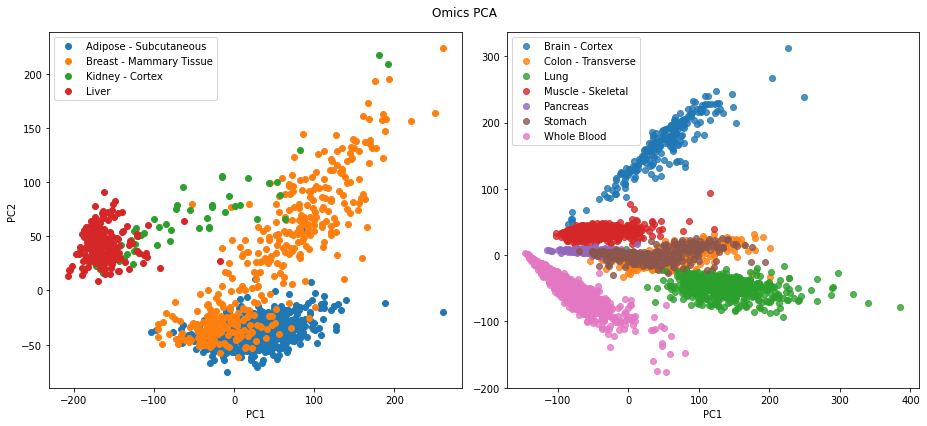

In [11]:
fig, ax = plt.subplots(1,2,figsize=(13, 6))
for t in sorted(tissue_meta["Tissue"].unique()):
    meta_indx = tissue_meta.iloc[np.where(tissue_meta["Tissue"] == t)[0],:].index
    sp = np.where(data_read.columns.str.contains("|".join(list(meta_indx)), case=False, regex=True))[0]
    ax[0].plot(data_read_pca[sp,0],data_read_pca[sp,1], 'o' , label=t)

for t in sorted(new_tissues):
    meta_indx = tissue_meta_allrin.iloc[np.where(tissue_meta_allrin["Tissue"] == t)[0],:].index
    sp = np.where(data_read_new.columns.str.contains("|".join(list(meta_indx)), case=False, regex=True))[0]
    ax[1].plot(data_new_pca[sp,0],data_new_pca[sp,1], 'o' , label=t,alpha=0.8)    
    
fig.suptitle("Omics PCA")
ax[0].set_ylabel('PC2')
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[0].legend(shadow=False)
ax[1].legend(shadow=False)
fig.tight_layout()
plt.show()

### Median TPM

In [3]:
median_tpm = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct"),
                header=0,skiprows=[0,1],sep="\t",index_col="Name").drop(["Description"],axis=1)

In [4]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(median_tpm.transpose()) 
median_tpm_vr = median_tpm.transpose().loc[:,constant_filter.get_support()]
print(median_tpm_vr.shape)

(54, 44219)


In [5]:
# median_tpm_sc = StandardScaler().fit_transform(median_tpm.transpose())
median_tpm_sc = StandardScaler().fit_transform(median_tpm_vr)
median_tpm_pca = PCA(n_components=0.95).fit_transform(median_tpm_sc)

In [21]:
median_tpm.columns[np.where(median_tpm_pca==median_tpm_pca.max())[0][0]]

'Testis'

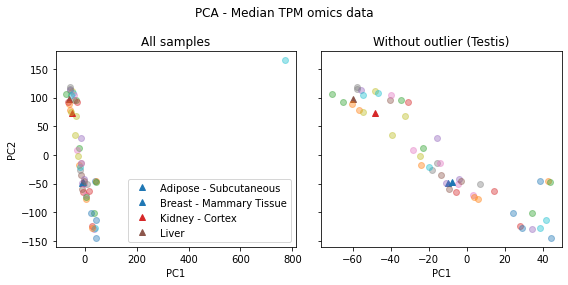

In [22]:
tissues = ["Adipose - Subcutaneous","Breast - Mammary Tissue","Kidney - Cortex","Liver"]
fig, ax = plt.subplots(1,2,figsize=(8, 4),sharey=True)
for sp,t in enumerate(median_tpm.columns):
    if t in tissues:
        ax[0].plot(median_tpm_pca[sp,0],median_tpm_pca[sp,1], '^' , label=t)
        ax[1].plot(median_tpm_pca[sp,0],median_tpm_pca[sp,1], '^' , label=t)
    else:
        ax[0].plot(median_tpm_pca[sp,0],median_tpm_pca[sp,1], 'o' , label="__nolabel__",alpha=0.4)
        if sp != np.where(median_tpm_pca==median_tpm_pca.max())[0][0]:
            ax[1].plot(median_tpm_pca[sp,0],median_tpm_pca[sp,1], 'o' , label="__nolabel__",alpha=0.4)
        
fig.suptitle("PCA - Median TPM omics data")
ax[0].set_title("All samples")
ax[1].set_title("Without outlier (Testis)")
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].legend(shadow=False)
fig.tight_layout()
plt.show()

### Grouped TPM (no RIN filter)

In [103]:
tissues = ["Adipose - Subcutaneous","Breast - Mammary Tissue","Kidney - Cortex","Liver"]
grp_data = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtex_v8_median_by_TSAn.csv"),header=[0,1,2],index_col=0)
print(grp_data.shape)

(56200, 296)


In [8]:
grp_data.loc(axis=1)[tissues,:].head(3)

Tissue            Adipose - Subcutaneous                                 \
SEX                                    1                      2           
AGE_NEW                            20-39   40-59   60-79  20-39   40-59   
Name                                                                      
ENSG00000223972.5                  0.000  0.0000  0.0000  0.000  0.0000   
ENSG00000227232.5                  3.904  4.1985  4.0375  4.125  3.7735   
ENSG00000278267.1                  0.000  0.0000  0.0000  0.000  0.0000   

Tissue                   Breast - Mammary Tissue                      ...  \
SEX                                            1                   2  ...   
AGE_NEW            60-79                   20-39 40-59  60-79  20-39  ...   
Name                                                                  ...   
ENSG00000223972.5  0.000                   0.000  0.00  0.000  0.000  ...   
ENSG00000227232.5  4.144                   3.993  4.02  4.567  4.268  ...   
ENSG00000278267.1  0.000                   0.000  0.00  0.000  0.000  ...   

Tissue            Kidney - Cortex                            Liver         \
SEX                             1        2                       1          
AGE_NEW                     60-79    20-39     40-59  60-79  20-39  40-59   
Name                                                                        
ENSG00000223972.5          0.0000  0.00689  0.014645  0.000  0.000  0.000   
ENSG00000227232.5          2.5215  4.16300  1.706500  2.992  1.546  1.744   
ENSG00000278267.1          0.0000  0.00000  0.000000  0.000  0.000  0.000   

Tissue                                             
SEX                              2                 
AGE_NEW            60-79     20-39   40-59  60-79  
Name                                               
ENSG00000223972.5  0.000  0.013995  0.0000  0.000  
ENSG00000227232.5  1.873  1.589000  1.7965  2.118  
ENSG00000278267.1  0.000  0.000000  0.0000  0.000  

[3 rows x 24 columns]

In [9]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(grp_data.loc(axis=1)[tissues,:].transpose()) 
grp_data_vr = grp_data.loc(axis=1)[tissues,:].transpose().loc[:,constant_filter.get_support()]
print(grp_data_vr.shape)

(24, 37998)


In [10]:
grp_data_sc = StandardScaler().fit_transform(grp_data_vr) 
grp_data_pca = PCA(n_components=2).fit_transform(grp_data_sc) 

In [12]:
grp_data.loc(axis=1)[tissues,:].columns[np.where(grp_data_pca==grp_data_pca.max())[0][0]]

('Kidney - Cortex', '2', '20-39')

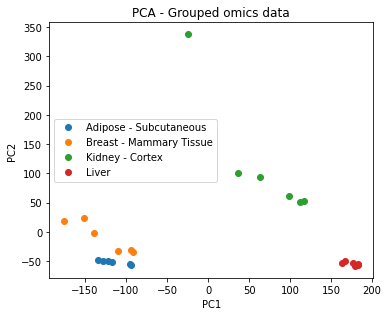

In [13]:
fig, ax = plt.subplots(figsize=(5.5, 4.5))
for t in sorted(grp_data_vr.index.get_level_values(0).unique()):
    meta_indx = np.where(grp_data_vr.index.get_level_values(0) == t)[0]
    ax.plot(grp_data_pca[meta_indx,0],grp_data_pca[meta_indx,1], 'o' , label=t)
ax.set_title("PCA - Grouped omics data")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(shadow=False)
fig.tight_layout()
plt.show()

In [104]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(grp_data.loc(axis=1)[new_tissues,:].transpose()) 
grp_new_data_vr = grp_data.loc(axis=1)[new_tissues,:].transpose().loc[:,constant_filter.get_support()]
print(grp_new_data_vr.shape)

grp_new_data_sc = StandardScaler().fit_transform(grp_new_data_vr) #sem o var thresh da igual
grp_new_data_pca = PCA(n_components=2).fit_transform(grp_new_data_sc)

(42, 37084)


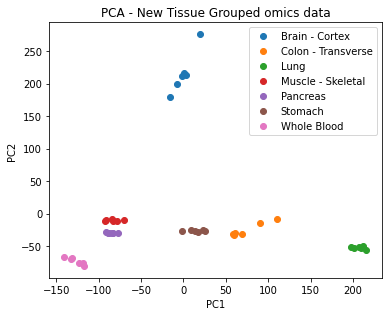

In [105]:
fig, ax = plt.subplots(figsize=(5.5, 4.5))
for t in sorted(grp_new_data_vr.index.get_level_values(0).unique()):
    meta_indx = np.where(grp_new_data_vr.index.get_level_values(0) == t)[0]
    ax.plot(grp_new_data_pca[meta_indx,0],grp_new_data_pca[meta_indx,1], 'o' , label=t)
ax.set_title("PCA - New Tissue Grouped omics data")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend(shadow=False)
fig.tight_layout()
plt.show()

### Thresholding strategy selection

In [120]:
model_genes = pd.ExcelFile(os.path.join(ROOT_FOLDER,"Human-GEM","model", 
                                      "Human-GEM.xlsx")).parse(sheet_name='GENES')["NAME"] #.drop('#', axis=1)
print(model_genes.shape)
data_genes = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_4tissues_rin6_tpm.csv"),usecols=[0],header=0)["Name"]
print(data_genes.shape)

(3626,)
(56200,)


In [121]:
data_genes.str.contains("|".join(model_genes),regex=True).sum()

3610

Gene scores
- preprocessing for integration
- global,localT2
- qvalues = [0.1,0.25,0.5,0.75,0.9]
- final threshold (for extraction ex: FASTCORE) is 0

ML setup (check gene_scoresLINUX.py):
- 1228 samples x 50k+ genes
- filter null variance genes (VarianceThreshold = 0)
- training set=gene scores for each parameter (or omics data directly)
- feature selection (500)
- Classification Random Forest models identifying source tissues
- average over (Cross Validation) CV=5, repeated 20x

In [63]:
omics = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_omics_4tissues_rin6_SC.csv"),
                    header=0,index_col=0).mean(axis=1)
modelomics = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_modelomics_4tissues_rin6_SC.csv"),
                         header=0,index_col=0).mean(axis=1)

gbl = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_global_4tissues_rin6_SC.csv"),
                  header=0,index_col=0)
lcl = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_local_4tissues_rin6_SC.csv"),
                  header=[0,1],index_col=0)

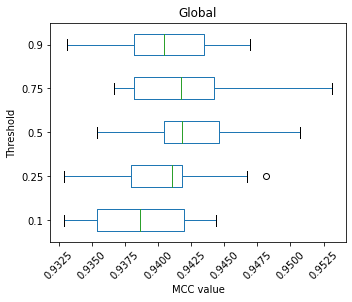

In [12]:
fig,ax = plt.subplots(figsize=(5,4))
gbl.plot(kind="box",vert=False,ylabel="Threshold",ax=ax,title="Global")
ax.set_xlabel("MCC value")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

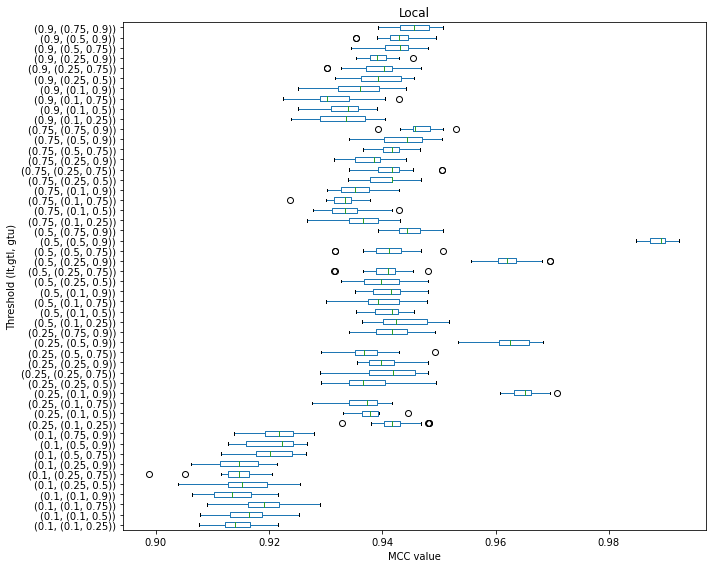

In [26]:
fig,ax = plt.subplots(figsize=(10,8)) 
lcl.plot(kind="box",vert=False,ylabel="Threshold (lt,gtl, gtu)",ax=ax,title="Local")
ax.set_xlabel("MCC value")
plt.tight_layout()
plt.show()

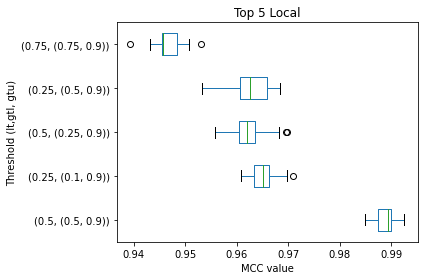

In [27]:
fig,ax = plt.subplots()
lcl.loc[:,lcl.max().sort_values(ascending=False).iloc[:5].index].plot(
    kind="box",vert=False,ylabel="Threshold (lt,gtl, gtu)",ax=ax,title="Top 5 Local")
ax.set_xlabel("MCC value")
plt.tight_layout()
plt.show()

Comparison to omics

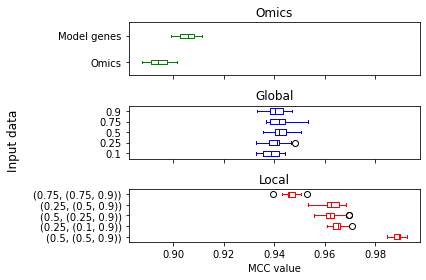

In [32]:
fig,ax = plt.subplots(3,1,sharex=True)
# omics.plot(kind="box",vert=False,ax=ax[0],title="Omics",color="green",label="") 
pd.concat((omics,modelomics),axis=1,keys=["Omics","Model genes"]).plot(kind="box",vert=False,color="green",
                                                                       ax=ax[0],title="Omics")

gbl.plot(kind="box",vert=False,ax=ax[1],title="Global",color="blue")
# ax[1].axvline(x=omics.median(), linestyle='-',color="g",alpha=0.7)

lcl.loc[:,lcl.max().sort_values(ascending=False).iloc[:5].index].plot(
    kind="box",vert=False,title="Local",ax=ax[2],color="red")
# ax[2].axvline(x=omics.median(), linestyle='-',color="g",alpha=0.7)

fig.supylabel('Input data') #Threshold
ax[2].set_xlabel("MCC value")
plt.tight_layout()
plt.show()

Best thresholding method: lt=0.5 / gtl=0.5 / gtu=0.9

In [89]:
tissue_meta = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","metadata_clean.csv"),header=0,index_col=0)

tpm_scores = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_4tissues_rin6_gtl50_gtu90_lt50.csv"),index_col=0,header=0)

In [91]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(tpm_scores) 
tpm_scores_vr = tpm_scores.loc[:,constant_filter.get_support()]

tpm_scores_sc = StandardScaler().fit_transform(tpm_scores_vr) 
tpm_scores_pca = PCA(n_components=2).fit_transform(tpm_scores_sc)

In [92]:
tissue_ids_max = []
for t in tissue_meta["Tissue"].unique():
    meta_indx = tissue_meta.iloc[np.where(tissue_meta["Tissue"] == t)[0], :].index 
    sp_max = np.where(tpm_scores.index.str.contains("|".join(
        list(meta_indx)), case=False, regex=True))[0][:53] #[:min(len(meta_indx),100)] 
    tissue_ids_max.extend(sp_max)
tpm_scores_csms = tpm_scores.iloc[tissue_ids_max, :]

In [93]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(tpm_scores_csms) 
tpm_scores_csms_vr = tpm_scores_csms.loc[:,constant_filter.get_support()]

tpm_scores_csms_sc = StandardScaler().fit_transform(tpm_scores_csms_vr) 
tpm_scores_csms_pca = PCA(n_components=2).fit_transform(tpm_scores_csms_sc)

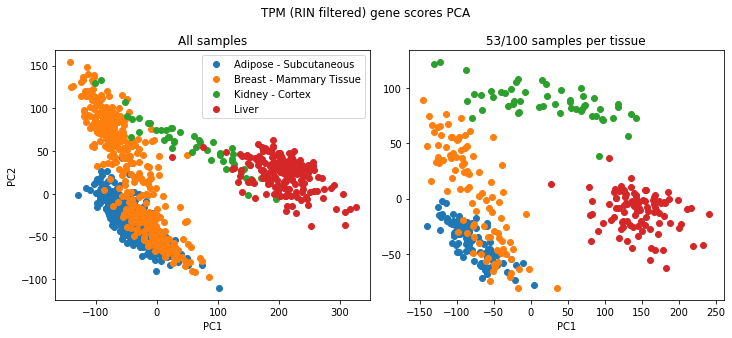

In [96]:
fig, ax = plt.subplots(1,2,figsize=(10.25, 4.75)) #,sharey=True
for t in sorted(tissue_meta["Tissue"].unique()):
    meta_indx = tissue_meta.iloc[np.where(tissue_meta["Tissue"] == t)[0],:].index
    sp = np.where(tpm_scores_vr.index.str.contains("|".join(list(meta_indx)), case=False, regex=True))[0]
    ax[0].plot(tpm_scores_pca[sp,0],tpm_scores_pca[sp,1], 'o' , label=t)
    
    sp2 = np.where(tpm_scores_csms_vr.index.str.contains("|".join(list(meta_indx)), case=False, regex=True))[0][:53]
    ax[1].plot(tpm_scores_csms_pca[sp2,0],tpm_scores_csms_pca[sp2,1], 'o' , label=t)

fig.suptitle("TPM (RIN filtered) gene scores PCA")
ax[0].set_title("All samples")
ax[1].set_title("53 samples per tissue")
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].legend(shadow=False)
fig.tight_layout()
plt.show()

### More tissue threshold selection

In [33]:
omicsmore = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_omics_more_rin6_SC.csv"),
                        header=0,index_col=0).mean(axis=1)
modelomicsmore = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_modelomics_more_rin6_SC.csv"),
                         header=0,index_col=0).mean(axis=1)
gblmore = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_global_more_rin6_SC.csv"),
                      header=0,index_col=0)
lclmore = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","results","threshold_test_local_more_rin6_SC.csv"),
                      header=[0,1],index_col=0)

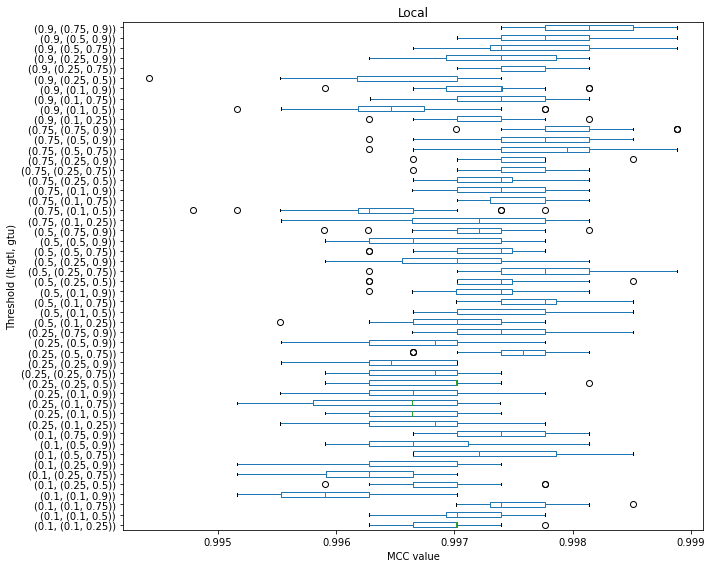

In [4]:
fig,ax = plt.subplots(figsize=(10,8)) 
lclmore.plot(kind="box",vert=False,ylabel="Threshold (lt,gtl, gtu)",ax=ax,title="Local")
ax.set_xlabel("MCC value")
plt.tight_layout()
plt.show()

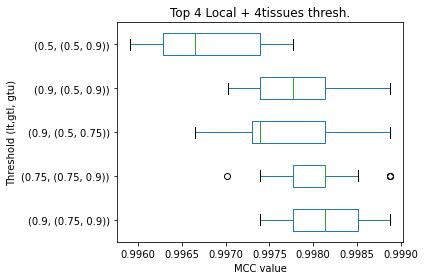

In [12]:
fig,ax = plt.subplots()
lclmore.loc[:,lclmore.max().sort_values(ascending=False).iloc[:4].index.to_list()+[("0.5","(0.5, 0.9)")]].plot(
    kind="box",vert=False,ylabel="Threshold (lt,gtl, gtu)",ax=ax,title="Top 4 Local + 4tissues thresh.")
ax.set_xlabel("MCC value")
plt.tight_layout()
plt.show()

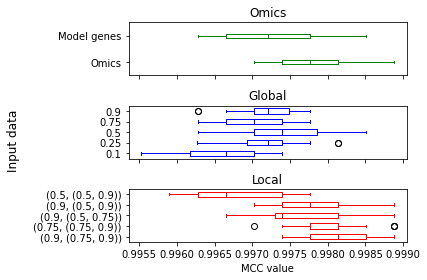

In [35]:
fig,ax = plt.subplots(3,1,sharex=True)
# omicsmore.plot(kind="box",vert=False,ax=ax[0],title="Omics",color="green",label="") 
pd.concat((omicsmore,modelomicsmore),axis=1,keys=["Omics","Model genes"]).plot(kind="box",vert=False,color="green",
                                                                       ax=ax[0],title="Omics")

gblmore.plot(kind="box",vert=False,ax=ax[1],title="Global",color="blue")
# ax[1].axvline(x=omics.median(), linestyle='-',color="g",alpha=0.7)

lclmore.loc[:,lclmore.max().sort_values(ascending=False).iloc[:4].index.to_list()+[("0.5","(0.5, 0.9)")]].plot(
    kind="box",vert=False,title="Local",ax=ax[2],color="red")
# ax[2].axvline(x=omics.median(), linestyle='-',color="g",alpha=0.7)

fig.supylabel('Input data') #matplotlib 3.4
ax[2].set_xlabel("MCC value")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# tissue_meta_allrin = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","allrin6_metadata_clean.csv"),header=0,index_col=0)
more_scores = pd.read_csv(os.path.join(ROOT_FOLDER,"DATA","gtexv8_more_rin6_gtl50_gtu90_lt50.csv"),
                          index_col=0,header=0).loc[save_samples_new,:] #,nrows=1

In [66]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(more_scores) 
more_scores_vr = more_scores.loc[:,constant_filter.get_support()]

more_scores_sc = StandardScaler().fit_transform(more_scores_vr) 
more_scores_pca = PCA(n_components=2).fit_transform(more_scores_sc)

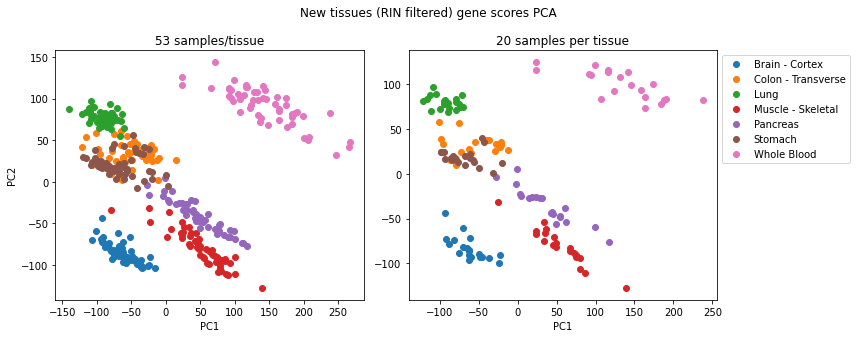

In [62]:
fig, ax = plt.subplots(1,2,figsize=(12, 4.75)) #,sharey=True
for t in sorted(new_tissues):
    meta_indx = tissue_meta_allrin.iloc[np.where(tissue_meta_allrin["Tissue"] == t)[0],:].index
    sp = np.where(more_scores_vr.index.str.contains("|".join(list(meta_indx)), case=False, regex=True))[0][:53]
    ax[0].plot(more_scores_pca[sp,0],more_scores_pca[sp,1], 'o' , label=t)
    
    sp2 = np.where(more_scores_vr.index.str.contains("|".join(list(meta_indx)), case=False, regex=True))[0][:20]
    ax[1].plot(more_scores_pca[sp2,0],more_scores_pca[sp2,1], 'o' , label=t)

fig.suptitle("New tissues (RIN filtered) gene scores PCA")
ax[0].set_title("53 samples/tissue")
ax[1].set_title("20 samples per tissue")
ax[0].set_xlabel('PC1')
ax[1].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].legend(shadow=False,bbox_to_anchor=(1,1))
fig.tight_layout()
plt.show()